In [94]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
df = pd.read_csv('C:\\Users\\PC\\Downloads\\Admission_Predict_Classification.csv')

In [69]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,True
1,2,324,107,4,4.0,4.5,8.87,1,True
2,3,316,104,3,3.0,3.5,8.00,1,False
3,4,322,110,3,3.5,2.5,8.67,1,True
4,5,314,103,2,2.0,3.0,8.21,0,False


In [70]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admitted           400 non-null    bool   
dtypes: bool(1), float64(3), int64(5)
memory usage: 25.5 KB


In [72]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.016755
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.686138
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.672465
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.638983
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.612152
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.557481
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.737307
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.519441
Admitted,0.016755,0.686138,0.672465,0.638983,0.612152,0.557481,0.737307,0.519441,1.000000


In [73]:
df.duplicated().sum()

0

In [74]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admitted             0
dtype: int64

<AxesSubplot:>

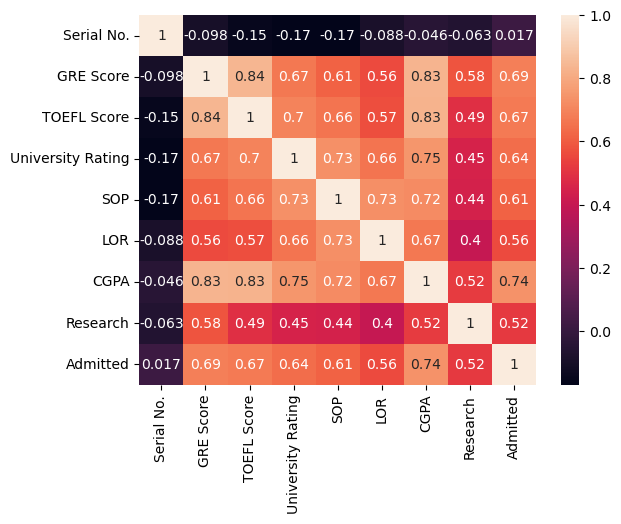

In [76]:
sns.heatmap(df.corr(),annot=True,)

<function matplotlib.pyplot.show(close=None, block=None)>

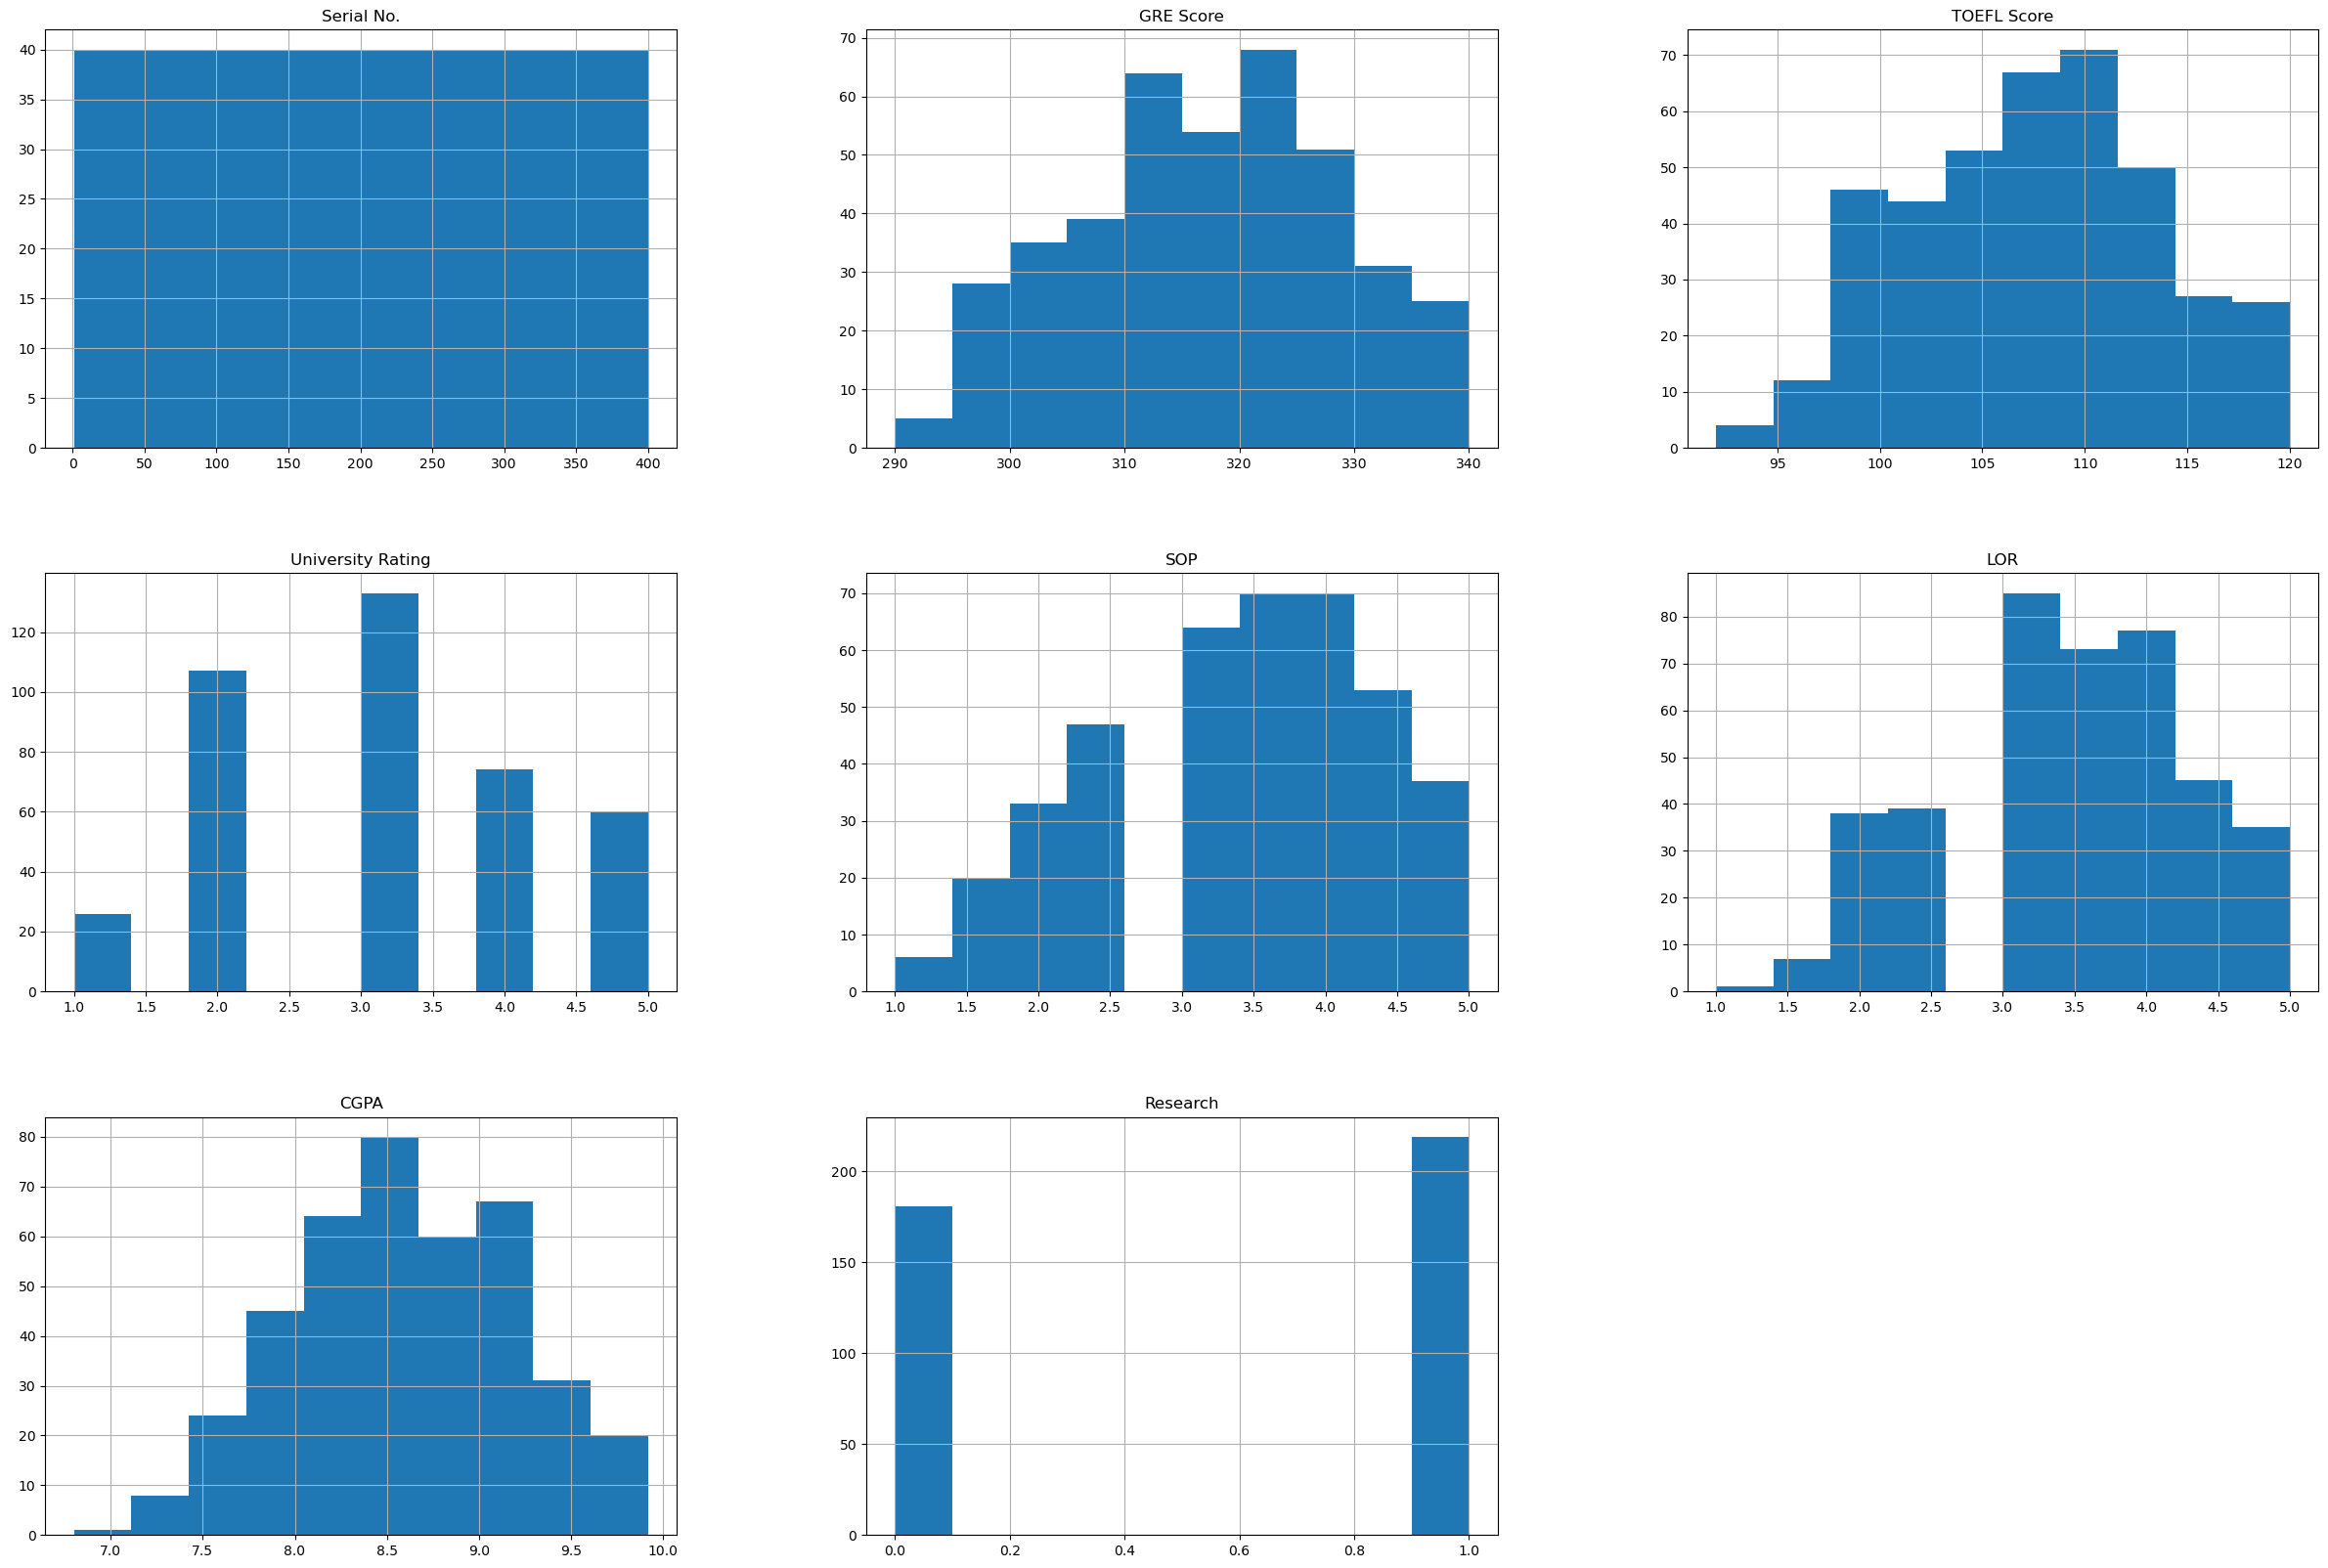

In [80]:
df.iloc[:,:].hist(figsize=(30,20))
plt.show

In [97]:
x=df.drop('Admitted',axis=1)
y=df['Admitted']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [98]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
predict=lr.predict(x_test)
accuracy = accuracy_score(y_test, predict)

print(f"Log Accuracy: {accuracy}")

print(confusion_matrix(y_test, predict))

print(classification_report(y_test, predict))


Log Accuracy: 0.8375
[[43  5]
 [ 8 24]]
              precision    recall  f1-score   support

       False       0.84      0.90      0.87        48
        True       0.83      0.75      0.79        32

    accuracy                           0.84        80
   macro avg       0.84      0.82      0.83        80
weighted avg       0.84      0.84      0.84        80

